<a href="https://colab.research.google.com/github/paranjaa/ece1508-student-depression-project/blob/main/ECE1508_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello World")

Hello World


In [ ]:
#basing this off some gpt-generated code, with a few changes

2.5.1+cu124


In [ ]:
#import each one of the libraries
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
#need to check if this works with others
df = pd.read_csv('gdrive/My Drive/ECE1508/Project/Student_Depression_Dataset.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
#Probably need to do some cleaning on this? Change some of the columns to numeric values?
X = df.iloc[:, 5:9].values  # selecting some of the numeric columns
y = df.iloc[:, -1].values   # only take the last one, since it has our label


In [ ]:
#might want to find a better way to do this, it's weird that train_test_split is its own thing,
#like tensorflow just has .sample()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)


In [ ]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

#need to look into how dataloaders work, also that the test set doesn't need to be shuffled
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        #probably want to mess with the sizes here to better fit the model?
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

In [ ]:
model = SimpleNN(X_train.shape[1])
criterion = nn.BCELoss()  #also tweek this learning
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [ ]:
num_epochs = 20
train_losses = []

for epoch in range(num_epochs):
    epoch_loss = 0  # Track loss for this epoch
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()  # Sum up batch losses

    avg_loss = epoch_loss / len(train_loader)  # Average loss per epoch
    train_losses.append(avg_loss)  # Store for graphing

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")


Epoch 1/20, Loss: 0.5501
Epoch 2/20, Loss: 0.5496
Epoch 3/20, Loss: 0.5500
Epoch 4/20, Loss: 0.5498
Epoch 5/20, Loss: 0.5495
Epoch 6/20, Loss: 0.5494
Epoch 7/20, Loss: 0.5495
Epoch 8/20, Loss: 0.5493
Epoch 9/20, Loss: 0.5497
Epoch 10/20, Loss: 0.5497
Epoch 11/20, Loss: 0.5497
Epoch 12/20, Loss: 0.5492
Epoch 13/20, Loss: 0.5499
Epoch 14/20, Loss: 0.5494
Epoch 15/20, Loss: 0.5501
Epoch 16/20, Loss: 0.5492
Epoch 17/20, Loss: 0.5500
Epoch 18/20, Loss: 0.5495
Epoch 19/20, Loss: 0.5499
Epoch 20/20, Loss: 0.5497


In [ ]:
#probably would have been useful to know doing it like this during a2
model.eval()
with torch.no_grad():
    correct, total = 0, 0
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        predicted = (outputs >= 0.5).float()
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.7318


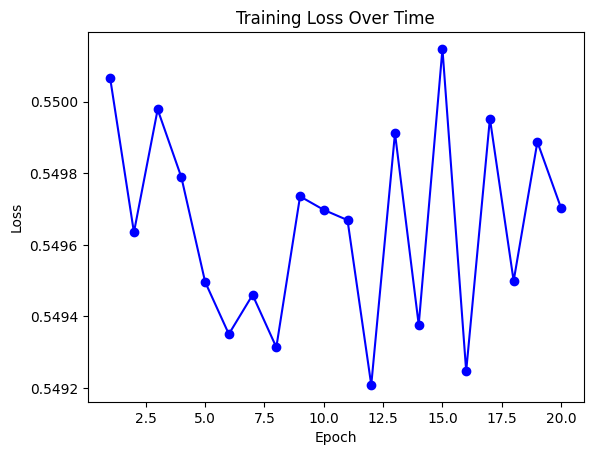

In [ ]:
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', linestyle='-', color='b')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.show()

#well, this needs improvements, it's not converging that well at all

In [1]:
#old code based on a previous project I did. Doesn't work, so I went and used an LLM to get some example code and made the section above
#definitely want to do something better though

# @title
# print("Hello World")
# from google.colab import drive
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# csv_file = 'drive/My Drive/Colab_Notebooks/ECE 1508/Project/Datasets/Student Depression Dataset.csv'

# student_data = pd.read_csv(csv_file)
# student_df = pd.read_csv(csv_file)


# student_data.head()
# # student_df.info()




# #make a training set
# student_train = student_data.sample(frac=0.7,random_state=100)
# #also a test set
# student_test = student_train.drop(student_train.index)


# #get our label from the dataset (just the depression column)
# #convert it to boolean
# depression_train = np.array(student_train['Depression'])
# depression_train = depression_train.astype(bool)


# #probably need to change some values here?
# #like, converting yes to 1,
# input_data = np.array(student_train[[
#    'Study Satisfaction',
#     ]])

# input_data = input_data.astype(float)



# x_train = input_data.reshape(-1,1)
# y_train = depression_train




# model = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(units=1, activation=None),
#   tf.keras.layers.Dense(units=3, activation=None),
#   tf.keras.layers.Dense(units=5, activation=None),

# ])

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
# loss=tf.keras.losses.mae)


# #not sure I'm setting this up right, maybe swtich back to pytorch?
# model.fit(x_train,y_train,epochs=1)



# model.summary()


# history = model.fit(x_train,y_train,epochs=100)

